In [16]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.animation as ani
import folium
import os
from folium.features import DivIcon
import matplotlib.pyplot as plt 


In [26]:
training_data =pd.read_excel(r"C:\Users\JakeStill\OneDrive - Zest Eco Ltd\Documents\Atlantic2025\assets\TrainingData\TrainingBlogTimeLapse.xlsx",sheet_name='Logs')
training_data['Week_of_year'] = training_data['Date'].dt.isocalendar().week
training_data['Year'] = training_data['Date'].dt.isocalendar().year
training_data['Epoch'] = (training_data['Year']-2022)*52 +training_data['Week_of_year'] -45

train_groupby = training_data.groupby('Epoch',as_index=False)[['ErgDistance / km','RiverDistance / km']].sum()



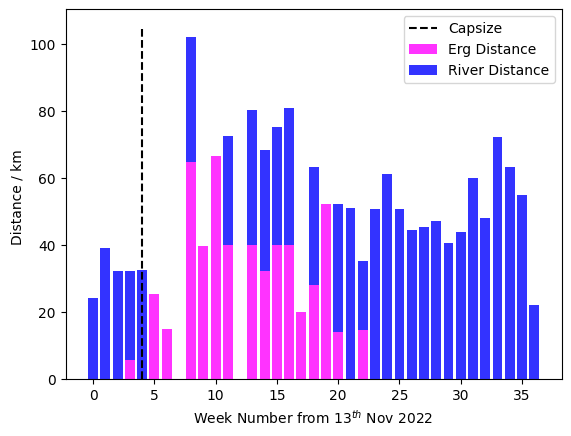

In [44]:

fig, ax = plt.subplots()

x_value = train_groupby['Epoch'].to_numpy()
Erg = train_groupby['ErgDistance / km'].to_numpy()
River = train_groupby['RiverDistance / km'].to_numpy()

ax.bar(x_value, Erg, color = "#FF00FF", alpha = 0.8,label ='Erg Distance' )
ax.bar(x_value, River, bottom = Erg, color = "blue", alpha = 0.8,label = 'River Distance')
ax.vlines([4],0,105,colors='black',ls='--',label='Capsize')
ax.legend()
ax.set_xlabel('Week Number from $13^{th}$ Nov 2022')
ax.set_ylabel('Distance / km ')
plt.savefig(r'C:\Users\JakeStill\OneDrive - Zest Eco Ltd\Documents\Atlantic2025\assets\Python\Outputs\TrainingBarChart\BarChartDistance.png')
plt.show()


In [35]:
geo_location_data =pd.read_excel(r"C:\Users\JakeStill\OneDrive - Zest Eco Ltd\Documents\Atlantic2025\assets\TrainingData\TrainingBlogTimeLapse.xlsx",sheet_name='WeeklyTotalsCoords')
geo_location_data = gpd.GeoDataFrame(geo_location_data,geometry=gpd.points_from_xy(geo_location_data['Longitude'],geo_location_data['Latitude']),crs='epsg:4326')
geo_location_data

,Week,Distance,Latitude,Longitude,geometry
0,202246,0.00,28.087034,-17.107234,POINT (-17.10723 28.08703)
1,202247,24.00,27.874771,-17.151613,POINT (-17.15161 27.87477)
2,202248,39.06,27.564766,-17.336924,POINT (-17.33692 27.56477)
3,202249,32.03,27.340322,-17.541576,POINT (-17.54158 27.34032)
4,202250,32.28,27.102878,-17.729789,POINT (-17.72979 27.10288)
5,202251,57.70,26.742116,-18.147711,POINT (-18.14771 26.74212)
6,202252,15.00,26.661016,-18.270160,POINT (-18.27016 26.66102)
7,20232,64.40,26.236647,-18.712333,POINT (-18.71233 26.23665)
8,20233,66.60,25.791027,-19.156662,POINT (-19.15666 25.79103)
9,20234,40.00,25.563654,-19.467817,POINT (-19.46782 25.56365)


In [36]:
atlantic = folium.Map(location = [22.9619825306386, -41.243511983153894],
                                        zoom_start = 5)

tile = folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
       ).add_to(atlantic)
atlantic

In [37]:
from html2image import Html2Image
hti = Html2Image(output_path=r'C:\Users\JakeStill\OneDrive - Zest Eco Ltd\Documents\Atlantic2025\assets\Python\Outputs\RowingGeoPath',custom_flags=['--virtual-time-budget=100000', '--hide-scrollbars'])

coords = geo_location_data[['Latitude','Longitude']].to_numpy().tolist()
count = 0
frames = []
for i in np.arange(len(coords)):

    atlantic = folium.Map(location = [22.9619825306386, -41.243511983153894],
                                        zoom_start = 5)

    tile = folium.TileLayer(
            tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
            attr = 'Google',
            name = 'Google Maps',
            overlay = True,
            control = True
        ).add_to(atlantic)
    atlantic
    

    if i ==0:
        folium.Marker(coords[0],icon=folium.Icon(color='purple',icon_color='purple')).add_to(atlantic)
        folium.Marker([17.008242247569843, -61.76391832037273],icon=folium.Icon(color='black',icon_color='black')).add_to(atlantic)
    else:
        distance = np.sum(geo_location_data['Distance'].to_numpy()[0:i+1])
        folium.Marker(coords[0],icon=folium.Icon(color='purple',icon_color='purple')).add_to(atlantic)
        folium.Marker([17.008242247569843, -61.76391832037273],icon=folium.Icon(color='black',icon_color='black')).add_to(atlantic)
        folium.Marker(
            [33.25296265319919, -41.49012299347318],
                icon=DivIcon(
            
            
            html=f'<div style="font-size: 16pt">Distance:{np.round(distance)}km   Week:{i} </div>'
                )
                ).add_to(atlantic)
        folium.PolyLine(coords[0:i+1], color='black').add_to(atlantic)
        
    filepath = os.path.join(r"C:\Users\JakeStill\OneDrive - Zest Eco Ltd\Documents\Atlantic2025\assets\Python\Outputs\RowingGeoPath","Image"+str(count)+".html")
    atlantic.save(filepath)
    
    hti.screenshot(html_file=filepath,save_as="Image"+str(count)+".jpg").append(frames)
    count+=1

In [38]:
atlantic

In [43]:
import glob
from PIL import Image
def number(filename):
    
    return int(filename[107:-4])

frames = [Image.open(image) for image in sorted(glob.glob(r"C:\Users\JakeStill\OneDrive - Zest Eco Ltd\Documents\Atlantic2025\assets\Python\Outputs\RowingGeoPath/*.jpg"),key=number)]


frame_one = frames[0]
frame_one.save(r'C:\Users\JakeStill\OneDrive - Zest Eco Ltd\Documents\Atlantic2025\assets\Python\Outputs\RowingGeoPath\Rowing.gif', format="GIF", append_images=frames,
                   save_all=True, duration=250, loop=0)